# Weather Data Analysis using Python 
This notebook analysis  weather data to identify trends in temprature, rainfall, and humidity using Pandas and Matplotlib.

## Import Required Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Loading 
The weather dataset is loaded into a pandas DataFrame for analysis.

In [2]:
df = pd.read_csv(r"C:\Users\MAITRI\Downloads\weather.csv")

## Dataset Overview
This section provides an overview of the dataset including its size and data types.

In [3]:
df.shape

(366, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

## Preview of Dataset 
This section disaplay the first few rows of the dataset to understand its structure and columns.

In [5]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


## Missing Values Analysis
This section check for missing values in the dataset to assess data quality before analysis.

In [6]:
df.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

## Handling Missing Values
Since the number of missing values is very small compared to the dataset size, missing values were handled using imputation techniques instead of droping rows to avoid data loss. Numerical columns were filled using mean values, while categorical wind direction columns were filled using mode.

### Numerical columns(mean)

In [7]:
df['Sunshine']= df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']= df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())

### Categorical columns(mode)

In [8]:
df['WindGustDir']= df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am']= df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm']= df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

Categorical wind direction columns were imputed using the most frequent value (mode) to maintain data consistency.

## Varification After Missing Value Treatment
After handling missing values, the dataset was rechecked to ensure thet no missing values remain.

In [9]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

## Descriptive Statistics
This section provides a statistical summary of numerical features to understand the distribution, central tendency, and spread of weather variables.

In [10]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.467180,13.023978,7.875308,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,6.000000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


## Temperature Analysis
This analysis explores temperature variations to understand overall weather patterns.

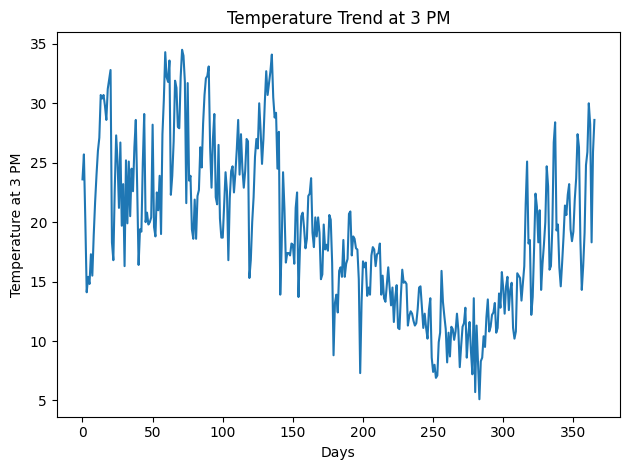

In [11]:
plt.figure()
plt.plot(df['Temp3pm'])
plt.xlabel('Days')
plt.ylabel('Temperature at 3 PM')
plt.title('Temperature Trend at 3 PM')
plt.tight_layout()
plt.savefig(images/temp_3pm_trend.png)
plt.show()

## Rainfall Analysis
Rainfall distribution helps in understanding precipitation patterns and identifying extreme rainfall events.

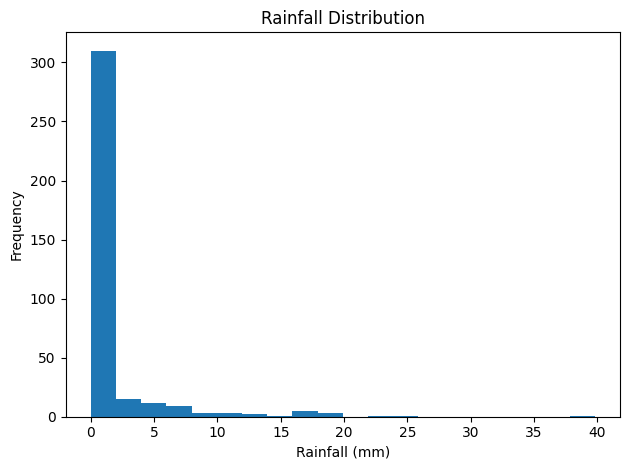

In [12]:
plt.figure()
plt.hist(df['Rainfall'], bins=20)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.title('Rainfall Distribution')
plt.tight_layout()
plt.savefig(images/rainfall_distribution.png)
plt.show()

## Wind Speed Analysis
The distribution of wind speed at 9am and 3pm shows moderate variability.
Most wind speed values fall within a lower to mid range, indicating generally stable wind conditions.
Extreme wind speeds are less frequent.

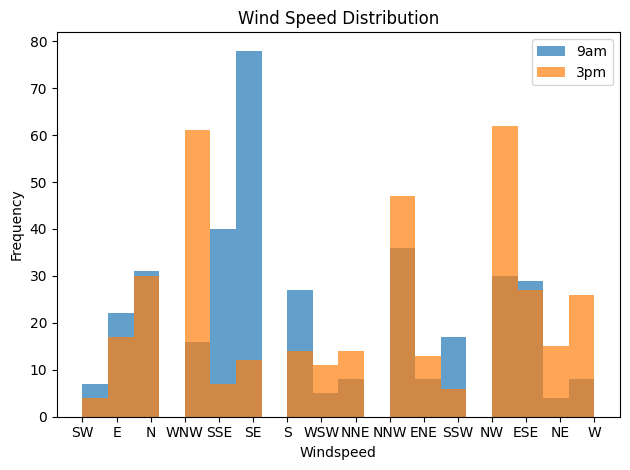

In [13]:
plt.figure()
plt.hist(df['WindDir9am'],bins=20,alpha = 0.7,label='9am')
plt.hist(df['WindDir3pm'],bins=20,alpha=0.7,label='3pm')
plt.xlabel('Windspeed')
plt.ylabel('Frequency')
plt.title('Wind Speed Distribution')
plt.legend()
plt.tight_layout()

plt.savefig(images/wind_speed_trend.png)
plt.show()

## Key Insights
- Temperature shows noticeable variation over time, indicating seasonal effects.
- Rainfall distribution is right-skewed, with most days having low rainfall.
- Humidity levels are generally higher in the morning than in the afternoon.
- Wind speed varies throughout the day, with higher variability observed at 3 PM.